# Ritz approximation and dissipative barrier methods for a Sturm-Liouville operator

In this notebook we will aim to compare a dissipative barrier method against the high-accuracy
eigenvalue calculation method outlined in [1] for finding the eigenvalues of the
Sturm-Liouville operator

$$Ly = -y'' + Q(x)y$$

where $Q(x) = \sin(x) - \frac{40}{1+x^2}$.

[1] Aceto, Ghelardoni & Marletta (2006) Numerical computation of eigenvalues in spectral gaps of Sturm–Liouville operators, Journal of Computational and Applied Mathematics

In [1]:
from typing import Dict

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from specpol.ritz import sturm_liouville_bdd, sturm_liouville_halfline
from specpol.plot import plot_ritz

In [2]:
def plot(ritz_results: Dict[int, np.array], dbm=None):
    # plot the approximation with some added bars and lines

    fig, ax1, ax2 = plot_ritz(ritz_results, dbm=dbm)

    ax1.set_ylim(-0.5, 2.5)
    ax1.axhline(0.335936534279424, linestyle="--", alpha=0.6)
    ax1.axhline(0.536620364148446, linestyle="--", alpha=0.6)
    ax1.axhline(0.580834838005921, linestyle="--", alpha=0.6)
    ax1.axhline(0.591500609480355, linestyle="--", alpha=0.6)

    ax1.axhline(0.949634991713441, linestyle="--", alpha=0.6)
    ax1.axhline(1.24466406161563, linestyle="--", alpha=0.6)
    ax1.axhline(1.29192807845892, linestyle="--", alpha=0.6)

    ax1.axhspan(-0.3784, -0.34766, facecolor="green", alpha=0.2)
    ax1.axhspan(0.594799, 0.9180581788, facecolor="green", alpha=0.2)
    ax1.axhspan(1.2931662851, 2.2851569481, facecolor="green", alpha=0.2)

    ax2.set_xlim(-0.5, 1.5)
    ax2.set_ylim(-0.5, 1.25)

    ax2.axvline(0.335936534279424, linestyle="--", alpha=0.6)
    ax2.axvline(0.536620364148446, linestyle="--", alpha=0.6)
    ax2.axvline(0.580834838005921, linestyle="--", alpha=0.6)
    ax2.axvline(0.591500609480355, linestyle="--", alpha=0.6)

    ax2.axvline(0.949634991713441, linestyle="--", alpha=0.6)
    ax2.axvline(1.24466406161563, linestyle="--", alpha=0.6)
    ax2.axvline(1.29192807845892, linestyle="--", alpha=0.6)

    ax2.axvspan(-0.3784, -0.34766, facecolor="green", alpha=0.2)
    ax2.axvspan(0.594799, 0.9180581788, facecolor="green", alpha=0.2)
    ax2.axvspan(1.2931662851, 2.2851569481, facecolor="green", alpha=0.2)

    plt.show()

In [3]:
def potential(x):  # the potential Q(x) of the Sturm-Liouville operator
    return np.sin(x) - 40/(1+x**2)

In [ ]:
sl_spec = dict()
sl_spec_dbm = dict()

for i in tqdm(range(50, 275, 25)):
    sl_spec[i] = sturm_liouville_bdd(potential, (0, 70 * np.pi), i, 321, (np.pi/8, np.pi/2))
    sl_spec_dbm[i] = sturm_liouville_bdd(potential, (0, 70 * np.pi), i, 321, (np.pi/8, np.pi/2), db=(lambda x: x<=150))

In [ ]:
plot(sl_spec)
plot(sl_spec_dbm)

In [ ]:
rusl = dict()
for i in tqdm(range(50, 300, 50)):
    rusl[i] = sturm_liouville_halfline(potential, i, 250, np.pi/8)

In [ ]:
plot(rusl)

  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [03:27<00:00, 18.85s/it]


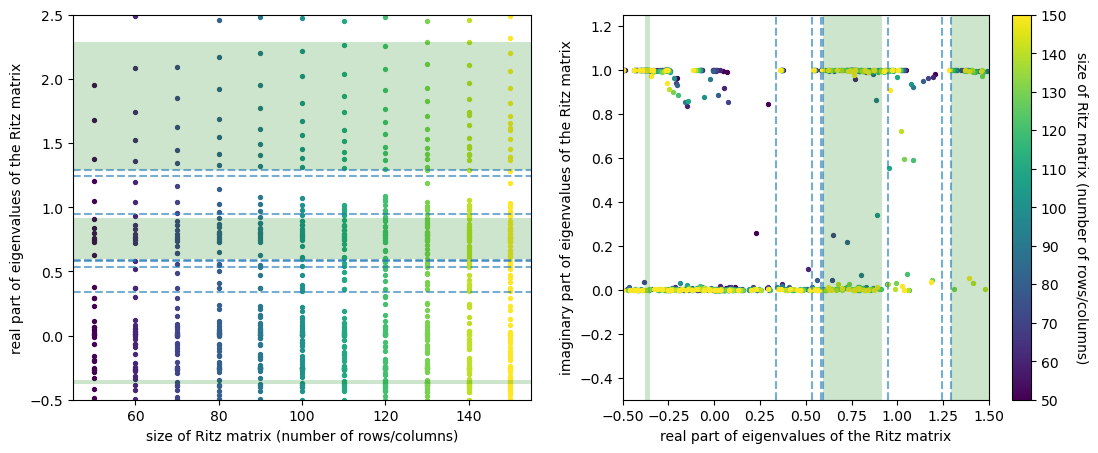

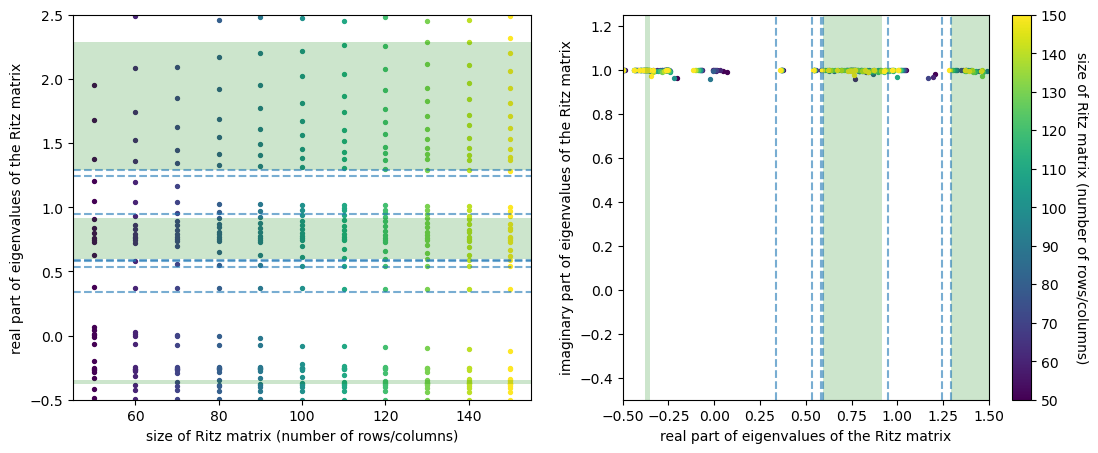

In [4]:
rusl_dbm = {}
for i in tqdm(range(50, 160, 10)):
    rusl_dbm[i] = sturm_liouville_halfline(potential, i, 250, alpha=np.pi/8, dbm=(lambda x: x<=100))
plot(rusl_dbm)
plot(rusl_dbm, dbm=0.95)

In [8]:
rusl_eigpairs = sturm_liouville_halfline(potential, 200, 250, alpha=np.pi/8, dbm=(lambda x: x<=100), returns='vectors')
strange_vals = rusl_eigpairs.filter(lambda x: x.real < -0.3784 and x.real > -0.5 and x.imag < 0.1)
good_vals = rusl_eigpairs.filter(lambda x: x.real < -0.3784 and x.real > -0.5 and x.imag > 0.95)
ground_state = rusl_eigpairs.filter(lambda x: x==min(list(rusl_eigpairs.data.keys())))

/home/alexhroom/.local/lib/python3.11/site-packages/specpol/common/laguerre.py:96: UserWarning: lagquad failed to bound all roots for the polynomial.
  warnings.warn("lagquad failed to bound all roots for the polynomial.")


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


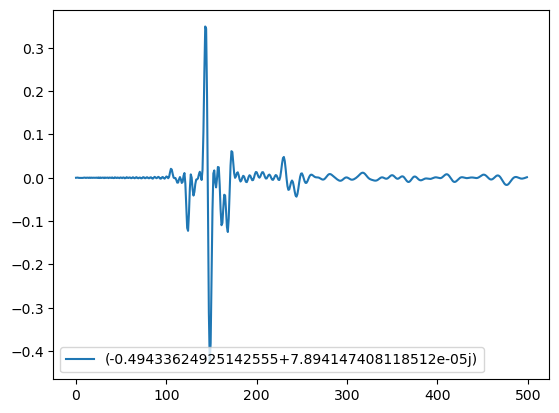

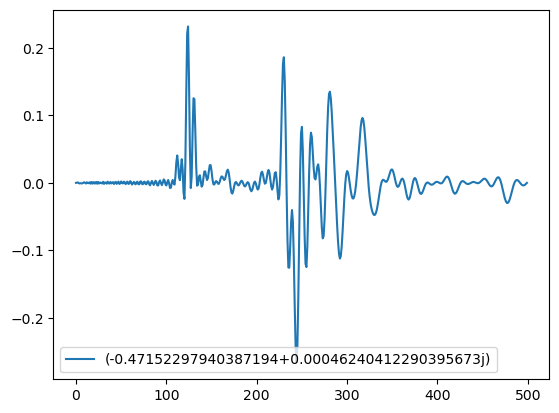

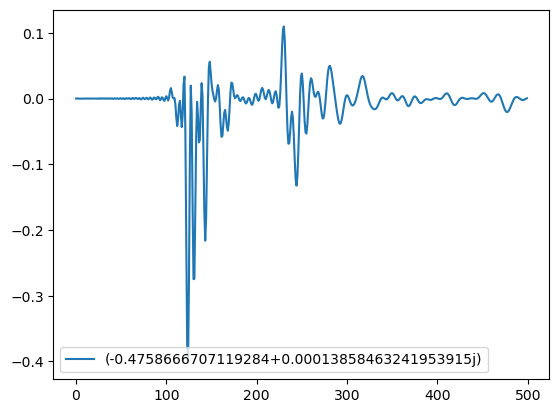

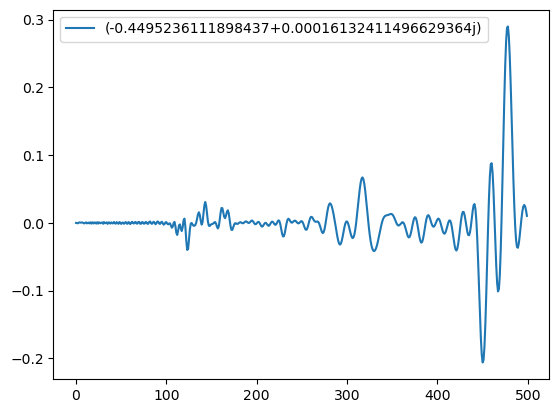

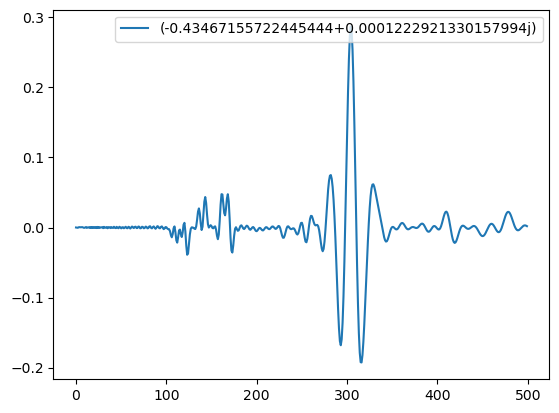

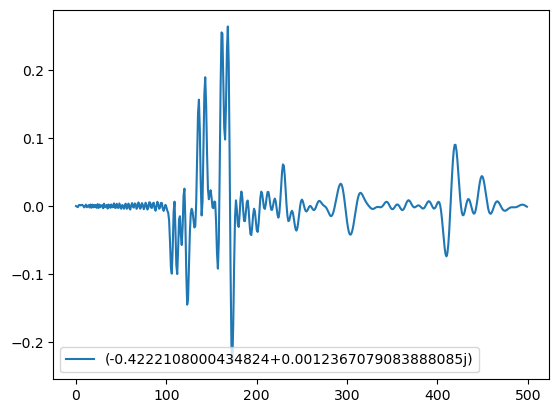

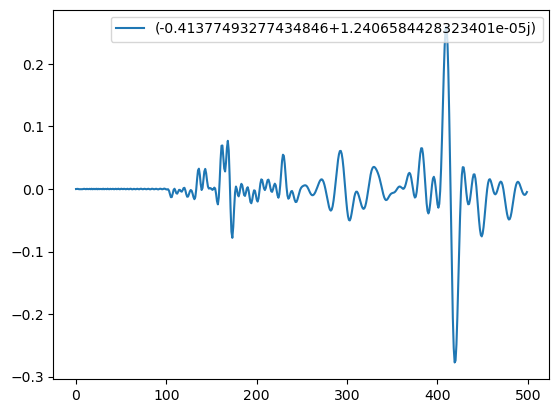

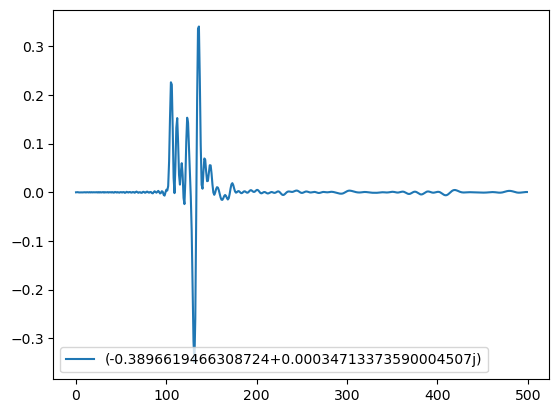

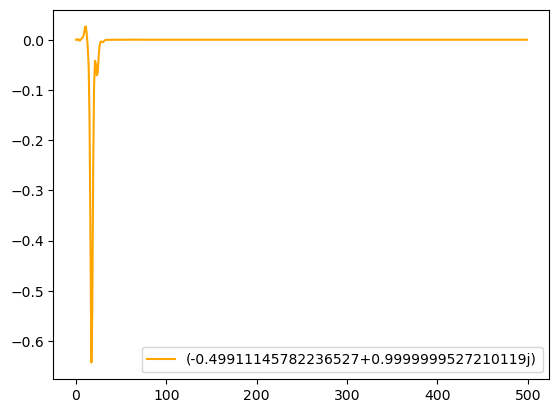

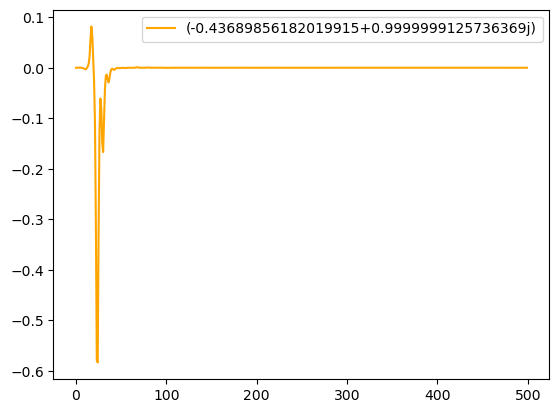

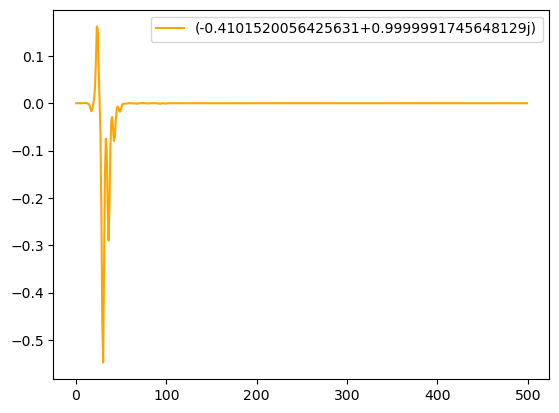

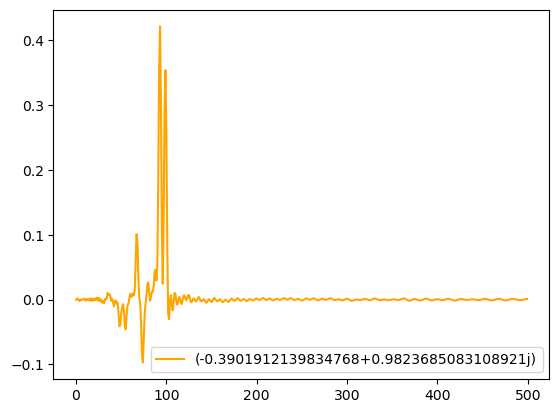

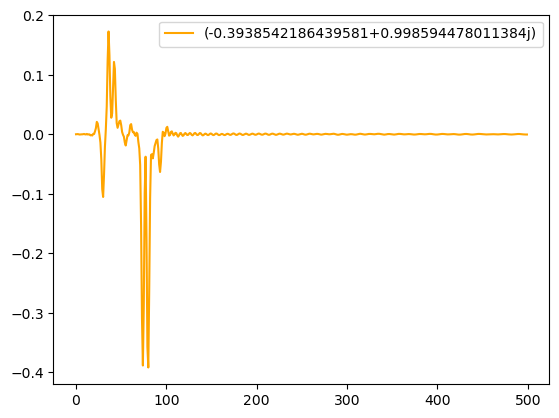

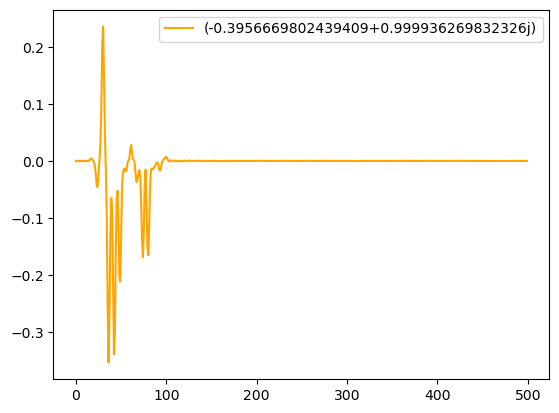

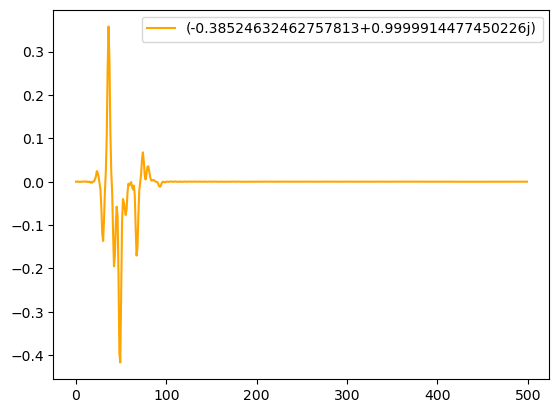

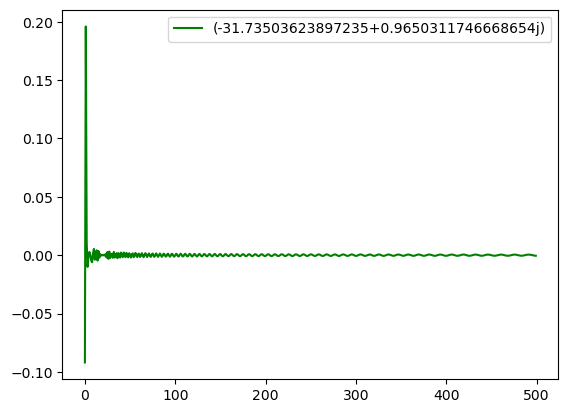

In [10]:
from specpol.common import laguerre
def disc_eigfunc(vec):
    def eigfunc(x):
        return sum(weight * laguerre(i, 0, x) * np.exp(-x/2) for i, weight in enumerate(vec, start=0))
    return [eigfunc(x) for x in np.linspace(0, 500, 500)]

for val, vec in strange_vals.items():
    plt.plot(disc_eigfunc(vec), label=f'{val}')
    plt.legend()
    plt.show()

for val, vec in good_vals.items():
    plt.plot(disc_eigfunc(vec), label=f'{val}', color='orange')
    plt.legend()
    plt.show()

for val, vec in ground_state.items():
    plt.plot(disc_eigfunc(vec), label=f'{val}', color='green')
    plt.legend()
    plt.show()